In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime
import math

# One Large Dataset

In [8]:
pete = pd.read_csv('../Mongoose Modeling/clean_pete_data.csv')
print(pete.shape)
pete.head()

(1740, 96)


,Unnamed: 0,ObservationID,ObservationTime,ObservationTimeApproximate,Troop,Observer,ObservationType,UTMNorthing,UTMEasting,LocationApproximate,...,IJU,IJUUncertain,T,A,S,J,TimeSinceLast,TDiff,ObsYear,ObsMonth
0,1,cgl0805061010,2008-05-06 10:10:00,0.0,CGL,Mpho Ramotadima,Foraging,8026213.0,296182.0,0.0,...,NaN,NaN,34.0,26.0,7.0,NaN,NaN,NaN,2008.0,5.0
1,2,cch0805061312,2008-05-06 13:12:00,0.0,CCH,Mpho Ramotadima,Resting,8027955.0,302179.0,0.0,...,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,2008.0,5.0
2,6,mow0805161125,2008-05-16 11:25:00,0.0,MOW,Pete Laver,Foraging,8033028.0,305117.0,0.0,...,NaN,NaN,14.0,7.0,2.0,4.0,NaN,NaN,2008.0,5.0
3,8,cch0805161505,2008-05-16 15:05:00,0.0,CCH,Pete Laver,Foraging,8027703.0,302507.0,0.0,...,NaN,NaN,3.0,3.0,NaN,NaN,10 days 00:00:00.000000000,-28.0,2008.0,5.0
4,9,csl0805161605,2008-05-16 16:05:00,0.0,CSL,Pete Laver,Foraging,8030194.0,303480.0,0.0,...,NaN,NaN,27.0,22.0,2.0,3.0,NaN,NaN,2008.0,5.0


In [9]:
census = pd.read_csv('../Mongoose Modeling/cleaner_census_data.csv',encoding = "ISO-8859-1")
print(census.shape)
census = census.rename(columns={"Count":"T","Date":"ObservationTime"})
census = census.drop(['Complete Count?'],axis=1)
census.head()

(1160, 7)


,Unnamed: 0,ObservationTime,Troop,Latitude,Longitude,T
0,22,2013-09-05,CCH,NaN,NaN,19.0
1,23,2013-09-12,CCH,-17.82746,25.13761,18.0
2,24,2013-09-25,CCH,-17.8274,25.13817,15.0
3,25,2013-10-01,CCH,-17.79475,25.15429,21.0
4,26,2013-10-02,CCH,-17.82833,25.13828,18.0


In [10]:
all_clean = pd.concat([pete,census], join_axes=[pete.columns])
print(all_clean.shape)
all_clean.head()

(2900, 96)


,Unnamed: 0,ObservationID,ObservationTime,ObservationTimeApproximate,Troop,Observer,ObservationType,UTMNorthing,UTMEasting,LocationApproximate,...,IJU,IJUUncertain,T,A,S,J,TimeSinceLast,TDiff,ObsYear,ObsMonth
0,1,cgl0805061010,2008-05-06 10:10:00,0.0,CGL,Mpho Ramotadima,Foraging,8026213.0,296182.0,0.0,...,NaN,NaN,34.0,26.0,7.0,NaN,NaN,NaN,2008.0,5.0
1,2,cch0805061312,2008-05-06 13:12:00,0.0,CCH,Mpho Ramotadima,Resting,8027955.0,302179.0,0.0,...,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,2008.0,5.0
2,6,mow0805161125,2008-05-16 11:25:00,0.0,MOW,Pete Laver,Foraging,8033028.0,305117.0,0.0,...,NaN,NaN,14.0,7.0,2.0,4.0,NaN,NaN,2008.0,5.0
3,8,cch0805161505,2008-05-16 15:05:00,0.0,CCH,Pete Laver,Foraging,8027703.0,302507.0,0.0,...,NaN,NaN,3.0,3.0,NaN,NaN,10 days 00:00:00.000000000,-28.0,2008.0,5.0
4,9,csl0805161605,2008-05-16 16:05:00,0.0,CSL,Pete Laver,Foraging,8030194.0,303480.0,0.0,...,NaN,NaN,27.0,22.0,2.0,3.0,NaN,NaN,2008.0,5.0


In [11]:
all_clean

,Unnamed: 0,ObservationID,ObservationTime,ObservationTimeApproximate,Troop,Observer,ObservationType,UTMNorthing,UTMEasting,LocationApproximate,...,IJU,IJUUncertain,T,A,S,J,TimeSinceLast,TDiff,ObsYear,ObsMonth
0,1,cgl0805061010,2008-05-06 10:10:00,0.0,CGL,Mpho Ramotadima,Foraging,8026213.0,296182.0,0.0,...,NaN,NaN,34.0,26.0,7.0,NaN,NaN,NaN,2008.0,5.0
1,2,cch0805061312,2008-05-06 13:12:00,0.0,CCH,Mpho Ramotadima,Resting,8027955.0,302179.0,0.0,...,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,2008.0,5.0
2,6,mow0805161125,2008-05-16 11:25:00,0.0,MOW,Pete Laver,Foraging,8033028.0,305117.0,0.0,...,NaN,NaN,14.0,7.0,2.0,4.0,NaN,NaN,2008.0,5.0
3,8,cch0805161505,2008-05-16 15:05:00,0.0,CCH,Pete Laver,Foraging,8027703.0,302507.0,0.0,...,NaN,NaN,3.0,3.0,NaN,NaN,10 days 00:00:00.000000000,-28.0,2008.0,5.0
4,9,csl0805161605,2008-05-16 16:05:00,0.0,CSL,Pete Laver,Foraging,8030194.0,303480.0,0.0,...,NaN,NaN,27.0,22.0,2.0,3.0,NaN,NaN,2008.0,5.0
5,10,mow0805161700,2008-05-16 17:00:00,0.0,MOW,Pete Laver,Denning,8033104.0,304863.0,0.0,...,NaN,NaN,13.0,5.0,3.0,4.0,0 days 00:00:00.000000000,-1.0,2008.0,5.0
6,12,mow0805170700,2008-05-17 07:00:00,0.0,MOW,Pete Laver,Denning,8033108.0,304863.0,0.0,...,NaN,NaN,8.0,5.0,3.0,NaN,1 days 00:00:00.000000000,-5.0,2008.0,5.0
7,13,csl0805170855,2008-05-17 08:55:00,0.0,CSL,Pete Laver,Moving,8029951.0,303458.0,0.0,...,NaN,NaN,21.0,20.0,NaN,1.0,1 days 00:00:00.000000000,-6.0,2008.0,5.0
8,14,trs0805171030,2008-05-17 10:30:00,0.0,TRS,Pete Laver,Foraging,8032626.0,307381.0,0.0,...,NaN,NaN,16.0,14.0,NaN,2.0,NaN,NaN,2008.0,5.0
9,17,mow0805171730,2008-05-17 17:30:00,0.0,MOW,Pete Laver,Denning,8032839.0,305556.0,0.0,...,NaN,NaN,1.0,1.0,NaN,NaN,0 days 00:00:00.000000000,-7.0,2008.0,5.0


In [12]:
all_clean.to_csv('../Mongoose Modeling/all_clean_data.csv')

In [34]:
all_clean.describe()

,Unnamed: 0,ObservationTimeApproximate,UTMNorthing,UTMEasting,LocationApproximate,ST,STUncertain,SM,SMUncertain,SF,...,IJFUncertain,IJU,IJUUncertain,T,A,S,J,TDiff,ObsYear,ObsMonth
count,3006.000000,1740.0,1.740000e+03,1740.000000,1740.0,1735.000000,1609.000000,274.000000,178.000000,257.000000,...,0.0,4.0,4.0,3005.000000,691.000000,398.000000,371.000000,1733.000000,1740.000000,1740.000000
mean,3033.250166,0.0,8.030276e+06,303918.327011,0.0,14.785591,0.211311,3.288321,0.084270,3.443580,...,NaN,1.0,0.0,33.436938,10.002894,6.371859,5.304582,-0.045009,2008.886207,6.520690
std,3535.096316,0.0,1.998322e+03,3759.033141,0.0,11.740815,0.408366,2.756426,0.278575,2.736781,...,NaN,0.0,0.0,131.135103,8.236539,5.621783,4.289075,11.382964,0.769408,3.290275
min,1.000000,0.0,8.025881e+06,295660.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,1.0,0.0,0.000000,1.000000,-13.000000,-2.000000,-59.000000,2008.000000,1.000000
25%,703.250000,0.0,8.030014e+06,303437.750000,0.0,6.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,1.0,0.0,7.000000,4.000000,3.000000,2.000000,-5.000000,2008.000000,4.000000
50%,1513.500000,0.0,8.030229e+06,303558.000000,0.0,11.000000,0.000000,2.000000,0.000000,3.000000,...,NaN,1.0,0.0,13.000000,7.000000,4.000000,4.000000,0.000000,2009.000000,6.000000
75%,2544.750000,0.0,8.031627e+06,304907.000000,0.0,21.000000,0.000000,4.000000,0.000000,5.000000,...,NaN,1.0,0.0,22.000000,15.000000,9.000000,7.000000,4.000000,2009.000000,9.000000
max,16321.000000,0.0,8.033108e+06,313156.000000,0.0,69.000000,1.000000,13.000000,1.000000,16.000000,...,NaN,1.0,0.0,999.000000,49.000000,34.000000,24.000000,56.000000,2010.000000,12.000000


In [36]:
np.sqrt(131.135103)

11.451423623288067

In [9]:
all_clean.columns

Index(['Unnamed: 0', 'ObservationID', 'ObservationTime',
       'ObservationTimeApproximate', 'Troop', 'Observer', 'ObservationType',
       'UTMNorthing', 'UTMEasting', 'LocationApproximate',
       'LocationDescription', 'Notes', 'ST', 'STUncertain', 'SM',
       'SMUncertain', 'SF', 'SFUncertain', 'SU', 'SUUncertain', 'SA',
       'SAUncertain', 'SAM', 'SAMUncertain', 'SAF', 'SAFUncertain', 'SAFP',
       'SAFPUncertain', 'SAFL', 'SAFLUncertain', 'SAFEN', 'SAFENUncertain',
       'SAU', 'SAUUncertain', 'SS', 'SSUncertain', 'SSM', 'SSMUncertain',
       'SSF', 'SSFUncertain', 'SSU', 'SSUUncertain', 'SJ', 'SJUncertain',
       'SJM', 'SJMUncertain', 'SJF', 'SJFUncertain', 'SJU', 'SJUUncertain',
       'IT', 'ITUncertain', 'IM', 'IMUncertain', 'IF', 'IFUncertain', 'IU',
       'IUUncertain', 'IA', 'IAUncertain', 'IAM', 'IAMUncertain', 'IAF',
       'IAFUncertain', 'IAFP', 'IAFPUncertain', 'IAFL', 'IAFLUncertain',
       'IAFEN', 'IAFENUncertain', 'IAU', 'IAUUncertain', 'IS', 'ISUncerta

In [10]:
all_clean.loc[all_clean.Troop == 'FOR']

,Unnamed: 0,ObservationID,ObservationTime,ObservationTimeApproximate,Troop,Observer,ObservationType,UTMNorthing,UTMEasting,LocationApproximate,...,IJU,IJUUncertain,T,A,S,J,TimeSinceLast,TDiff,ObsYear,ObsMonth
482,685,NaN,2016-01-06,NaN,FOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,686,NaN,2016-01-07,NaN,FOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,687,NaN,2016-01-13,NaN,FOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,688,NaN,2016-01-18,NaN,FOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,689,NaN,2016-01-20,NaN,FOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,690,NaN,2016-01-21,NaN,FOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,691,NaN,2016-01-22,NaN,FOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,692,NaN,2016-01-25,NaN,FOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,693,NaN,2016-01-26,NaN,FOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,694,NaN,2016-01-27,NaN,FOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Fusion/Fission Datasets

In [11]:
##Create individual data sets for fusion/fission occassions

##Since troops fuse/fiss multiple times, datasets contain troop data six months prior to the fusion or fission

In [12]:
###Fusion.csv is just a copy of clean_census_data.csv

In [13]:
fusion = pd.read_csv('../Mongoose Modeling/fusion_data.csv',encoding = 'ISO-8859-1')
fusion = fusion[pd.to_numeric(fusion.Count, errors='coerce').notnull()]
fusion.Count = pd.to_numeric(fusion.Count)
fusion.Date = pd.to_datetime(fusion.Date)
fusion.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Observation ID', 'Date', 'Time', 'Troop',
       'Observers', 'Location', 'Latitude', 'Longitude', 'Rain Type',
       'Land Use', 'Temperature', 'Cloud Cover', 'Wind', 'Wilderness',
       'Den Type', 'Park Habitat', 'Count', 'Complete Count?', 'Group Spread',
       'Number juveniles/ Sub-Adults', '# Pups', '# Pregnant',
       'Pregnant third', 'Identifiable Individuals', 'Number sick',
       'Illness Rank', 'Description of Signs', 'Number injured',
       'Description of Injuries', 'Feces', '# Feces', 'Urine',
       'Anal Gland Secr.', 'Comments', 'Mix', 'Troop Name', 'Split',
       'Columna1', 'Columna2', 'Columna3', 'AM/PM', 'Time up', 'Not seen',
       'Columna4', 'ObsYear', 'ObsMonth', 'cleaner', 'Tuple'],
      dtype='object')

c:\users\gabss\appdata\local\enthought\canopy\edm\envs\user\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: 
.resample() is now a deferred operation
You called __getitem__(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


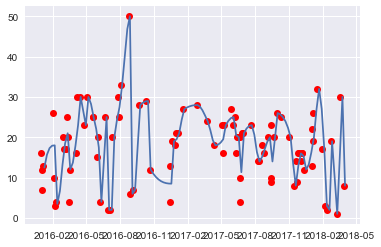

In [14]:
class Troop:
    
    def __init__(self,name,census):
        
        self.name = name
        self.census = census
        
    def T(self,interp_lev='W',method = 'linear',limit=10):
        test_series = pd.Series(self.census.set_index('Date')['Count'])
        upsampled = test_series.resample('W')
        interpolated = upsampled[1:].interpolate(method = method,limit = limit)
        return interpolated
    
        
    def fusion(self): 
        fus_list = []
        
        ##Build working data df
        wd = self.census

        ##Add month elapsed column to easily find months prior to fusion event
        wd['mon_elap'] = wd.ObsMonth + 12*(wd.ObsYear-list(wd.ObsYear)[0])

        ##List containing unique months that contain fusion event(s) for troop
        mon_list = wd.loc[fusion.Mix == 1].mon_elap.unique()

        ##Appending all fusion events with prior data to df
        for mon in mon_list:
            fus_list.append(wd.loc[(wd.mon_elap <= mon) & (wd.mon_elap >= mon - 6)])
        
        return fus_list


    def fission(self,prior):
        fis_list = []
        
        ##Build working data df
        wd = self.census

        ##Add month elapsed column to easily find months prior to fusion event
        wd['mon_elap'] = wd.ObsMonth + 12*(wd.ObsYear-list(wd.ObsYear)[0])

        ##List containing unique months that contain fusion event(s) for troop
        mon_list = wd.loc[fusion.Split == 1].mon_elap.unique()

        ##Appending all fusion events with prior data to df
        for mon in mon_list:
            fis_list.append(wd.loc[(wd.mon_elap <= mon) & (wd.mon_elap >= mon - prior)])
            
        return fis_list
    
    def census_plot(self,kwarg='-'):
        ##Builds a plot of the troop's census data
        plt.plot(np.array(self.census.Date),np.array(self.census.Count),kwarg)
        
        

CSL = Troop("MOW",fusion.loc[fusion.Troop == 'MOW'])
CSL.census_plot('ro')
plt.plot(CSL.T(method='pchip'))

In [15]:
fus_troops = fusion.loc[fusion.Mix == True].Troop.unique()
fus_troops

array(['CSL', 'FOR', 'KUBU', 'LIB', 'MOW', 'ODH', 'PLAT/LIB', 'SEF', 'WA',
       'WA/WPLAT', 'WPLAT'], dtype=object)

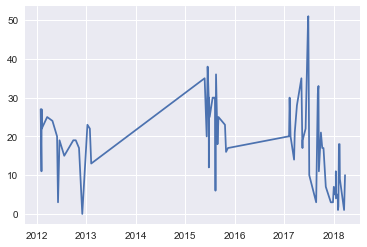

In [16]:
troop = Troop("LIB",fusion.loc[fusion.Troop == 'SEF'])
troop.census_plot()

Place NaNs in gaps between data
if there is more than 6 months between entries place empty rows with NaNs for Count
Look at interpolation data for creating the date entries to place NaNs

Only want ABC comparisons where the data is dense

##Function that finds six months of data before fusion or fission occurs and returns data in dataframe
##Uses fusion dataframe from fusion_data.csv (it's just a copy of cleaner_census_data.csv with all original columns)

##Function defaults to looking for fusion data
##Set mix = 0 to find fission


def fus_fis_set(troops, prior = 6, mix=1):
    
    fuse_lists = []
    name_list = []
    
    for troop in troops:
        
        
        ##List of dataframes for separate fusion events
        fuse_list = []
        
        ##Build working data df
        wd = fusion.loc[fusion.Troop == troop]
        
        ##Add month elapsed column to easily find months prior to fusion event
        wd['mon_elap'] = wd.ObsMonth + 12*(wd.ObsYear-list(wd.ObsYear)[0])
        
        ##List containing unique months that contain fusion/fission event(s) for troop
        if mix == 1:
            mon_list = wd.loc[fusion.Mix == 1].mon_elap.unique()
        if mix == 0:
            mon_list = wd.loc[fusion.Split == 1].mon_elap.unique()

        ##Appending all fusion events with prior data to df
        for mon in mon_list:
            fuse_list.append(wd.loc[(wd.mon_elap <= mon) & (wd.mon_elap >= mon - prior)])
        
        ##Appending troop's fuse_list to full list of fusion lists
        fuse_lists.append(fuse_list)
        
        ##Creating the list of dataframes to return
        if mix == 1:
            name = troop +'_fuse'
            name_list.append(name)
            vars()[name] = fuse_list
            
        if mix == 0:
            name = troop +'_fiss'
            name_list.append(name)
            vars()[name] = fuse_list
    
    print(name_list)
    
    ##Making final df of list of dfs of fusion events per troop
    #if mix == 1:
        #all_events = pd.DataFrame(data = fuse_lists,index=troops)
        
    #if mix == 0:
        #all_events = pd.DataFrame(data = fuse_lists,columns={'List of Fission Events'},index=troops)
        
    return fuse_lists#all_events
    
df = fus_fis_set(list(fus_troops))

df[0][0]

How to give individual names

In [17]:
for i in ['CSL','FOR','KUBU']:
    troop = i+'_fuse'
    vars()[troop] = fusion.loc[fusion.Troop == i]


How to identify six months data prior to fusion

In [18]:
prior = 6

wd = fusion.loc[fusion.Troop == 'CSL']
wd['mon_elap'] = wd.ObsMonth + 12*(wd.ObsYear-list(wd.ObsYear)[0])

df = pd.DataFrame()

mon_list = wd.loc[fusion.Mix == 1].mon_elap.unique()

for mon in mon_list:
    df.append(wd.loc[(wd.mon_elap <= mon) & (wd.mon_elap >= mon - prior)])
    
name = 
    

SyntaxError: invalid syntax (<ipython-input-18-6a9dd9ab132d>, line 13)

In [ ]:
listl = ['s','t','r','h']
lists = ['q','w','e','r']

df = pd.DataFrame(data = listl,columns = {'name'},index=lists)
df

In [13]:
len(census.loc[np.isnan(census['T'])==False])

1159

In [14]:
len(pete.loc[np.isnan(pete['T'])==False])

1740

In [15]:
1159+1740

2899